21:57:30 - cmdstanpy - INFO - Chain [1] start processing
21:57:31 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-01-01 00:00:00,75.905034,31.514408,105.233038,75.905034,75.905034,-9.595051,-9.595051,-9.595051,-6.242929,-6.242929,-6.242929,-3.352122,-3.352122,-3.352122,0.0,0.0,0.0,66.309983
1,2024-01-01 01:00:00,75.918629,26.587251,100.419939,75.918629,75.918629,-11.637889,-11.637889,-11.637889,-9.824866,-9.824866,-9.824866,-1.813023,-1.813023,-1.813023,0.0,0.0,0.0,64.280741
2,2024-01-01 02:00:00,75.932224,28.533570,102.006993,75.932224,75.932224,-10.669317,-10.669317,-10.669317,-10.350991,-10.350991,-10.350991,-0.318326,-0.318326,-0.318326,0.0,0.0,0.0,65.262907
3,2024-01-01 03:00:00,75.945819,34.799571,108.528394,75.945819,75.945819,-3.926272,-3.926272,-3.926272,-5.048156,-5.048156,-5.048156,1.121884,1.121884,1.121884,0.0,0.0,0.0,72.019547
4,2024-01-01 04:00:00,75.959414,46.217116,120.862489,75.959414,75.959414,6.795619,6.795619,6.795619,4.297413,4.297413,4.297413,2.498206,2.498206,2.498206,0.0,0.0,0.0,82.755033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4600,2024-10-26 23:00:00,54.081274,-33.267873,86.340742,9.191815,100.552675,-28.823184,-28.823184,-28.823184,-3.031495,-3.031495,-3.031495,-25.791689,-25.791689,-25.791689,0.0,0.0,0.0,25.258090
4601,2024-10-27 23:00:00,53.943870,-13.185186,105.205053,8.404193,100.921136,-7.956452,-7.956452,-7.956452,-3.031495,-3.031495,-3.031495,-4.924957,-4.924957,-4.924957,0.0,0.0,0.0,45.987419
4602,2024-10-28 23:00:00,53.806467,0.802367,127.841142,7.839728,101.337966,7.912641,7.912641,7.912641,-3.031495,-3.031495,-3.031495,10.944136,10.944136,10.944136,0.0,0.0,0.0,61.719108
4603,2024-10-29 23:00:00,53.669064,0.941956,118.829198,7.141776,102.115892,1.956112,1.956112,1.956112,-3.031495,-3.031495,-3.031495,4.987606,4.987606,4.987606,0.0,0.0,0.0,55.625175


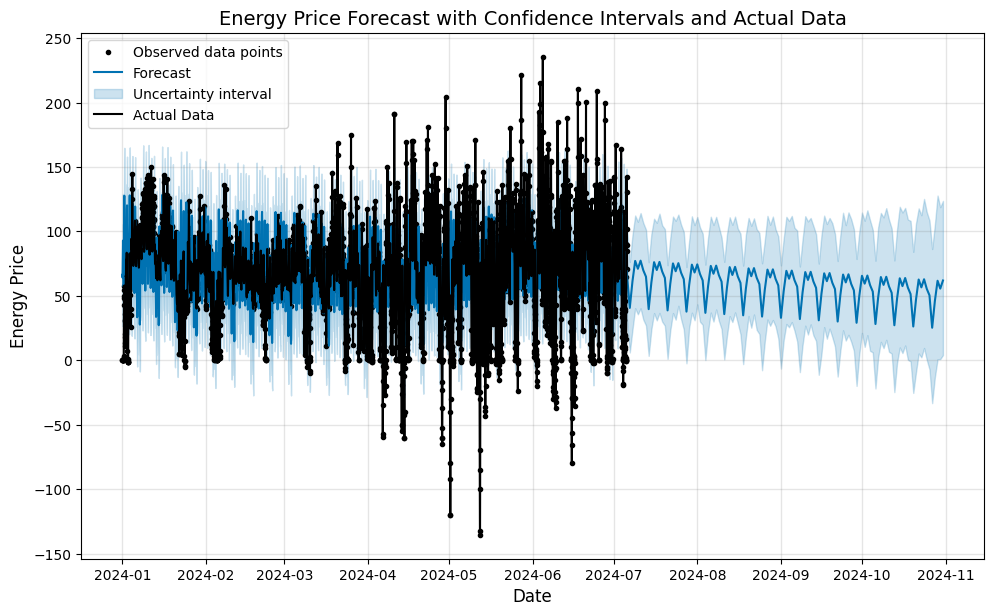

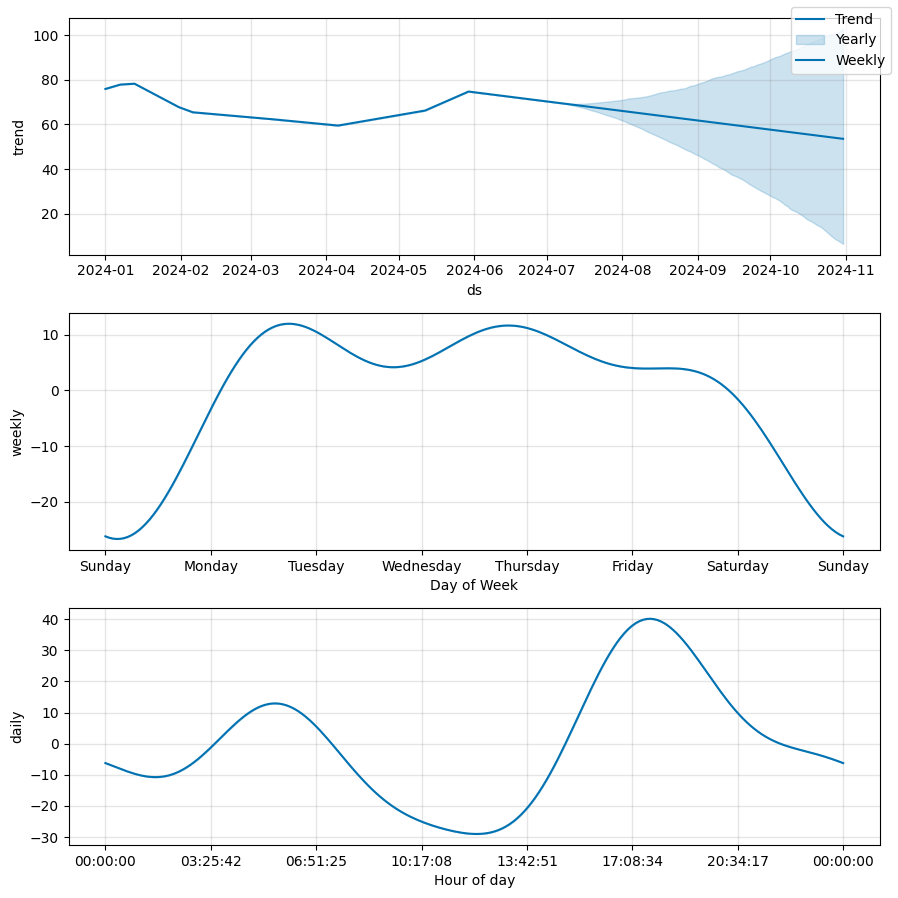

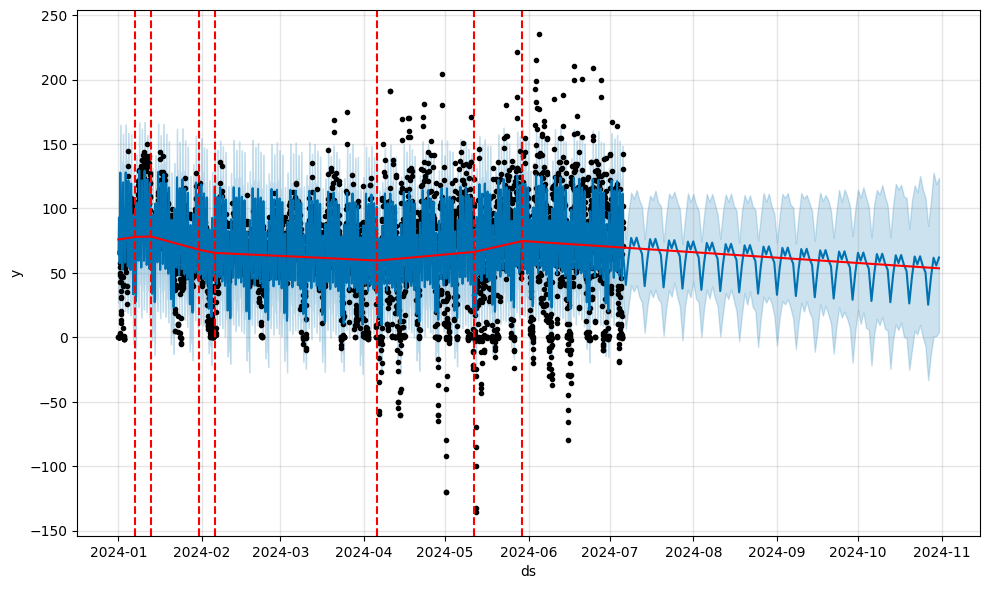

In [73]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 1. Read CSV data and filter: Use only data from 2024-01-01 to 2024-07-06
energy_prices = pd.read_csv("../data/day_ahead_energy_prices.csv")

# Filter to only include data between January 1, 2024, and July 6, 2024
energy_prices = energy_prices[(energy_prices['Datetime'] >= "2024-01-01") & (energy_prices['Datetime'] <= "2024-07-06")]

# 2. Rename columns to 'ds' for date and 'y' for values as required by Prophet
energy_prices = energy_prices.rename(columns={"Datetime": "ds", "hourly day-ahead energy price": "y"})

# 3. Remove timezone information from the 'ds' column
energy_prices['ds'] = pd.to_datetime(energy_prices['ds']).dt.tz_localize(None)

# 4. Initialize and train the Prophet model
m = Prophet()
m.fit(energy_prices)

# 5. Create a future dataframe for predictions up to October 31, 2024
# Calculate the number of days between July 6, 2024, and October 31, 2024
forecast_horizon = (pd.Timestamp("2024-10-31") - pd.Timestamp("2024-07-06")).days
future = m.make_future_dataframe(periods=forecast_horizon)
future.tail()

# 6. Make predictions
forecast = m.predict(future)

# 7. Plot the forecast
fig1 = m.plot(forecast)

# Manually add actual data to the plot
plt.plot(energy_prices['ds'], energy_prices['y'], color='black', label='Actual Data')

# Add legend for the predicted data, confidence interval, and actual data
plt.legend(loc='upper left')

# Add title and labels
plt.title('Energy Price Forecast with Confidence Intervals and Actual Data', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Energy Price', fontsize=12)

# 8. Plot the components of the forecast (trend, seasonality)
fig2 = m.plot_components(forecast)

# Add a legend to the components plot (for trend, weekly, yearly)
fig2.legend(['Trend', 'Yearly', 'Weekly'], loc='upper right')

# 9. Add changepoints to the forecast plot
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
forecast


In [55]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np

# Read the actual data from the CSV file
actual_data = pd.read_csv("../data/day_ahead_energy_prices.csv")

# Filter to include data only from January 1, 2024, to October 31, 2024
actual_data = actual_data[(actual_data['Datetime'] >= "2024-06-07") & (actual_data['Datetime'] <= "2024-10-31")]

# Rename columns to match Prophet's format: 'Datetime' -> 'ds', 'hourly day-ahead energy price' -> 'y'
actual_data = actual_data.rename(columns={"Datetime": "ds", "hourly day-ahead energy price": "y"})

# Convert 'ds' column to datetime and remove timezone information
actual_data['ds'] = pd.to_datetime(actual_data['ds']).dt.tz_localize(None)

# Set 'ds' as the index to facilitate merging with Prophet forecast data
actual_data = actual_data.set_index('ds')

# Ensure we're using the 'yhat' column from forecast to compare with actual 'y'
comparison_data = actual_data.join(future[['yhat']], how='inner')

# Calculate RMSE (Root Mean Squared Error) between actual values and Prophet predictions
rmse_score = np.sqrt(mean_squared_error(comparison_data['y'], comparison_data['yhat']))
print(f'RMSE Score on Test set: {rmse_score:.2f}')


RMSE Score on Test set: 28.74


### All Data Set test

22:09:33 - cmdstanpy - INFO - Chain [1] start processing
22:13:47 - cmdstanpy - INFO - Chain [1] done processing


                       ds       yhat  yhat_lower  yhat_upper
53400 2025-02-02 22:00:00  25.344059  -59.198444  101.368991
53401 2025-02-03 22:00:00  42.781920  -40.862563  123.111892
53402 2025-02-04 22:00:00  18.220151  -59.259681   96.145618
53403 2025-02-05 22:00:00  29.159695  -53.601117  114.752905
53404 2025-02-06 22:00:00  29.412476  -53.634473  111.359018


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-09-30 22:00:00,42.437036,-27.836434,85.611366,42.437036,42.437036,-13.198446,-13.198446,-13.198446,-7.490817,...,-4.818118,-4.818118,-4.818118,-0.889511,-0.889511,-0.889511,0.0,0.0,0.0,29.238591
1,2018-09-30 23:00:00,42.478959,-26.173497,88.861695,42.478959,42.478959,-13.761495,-13.761495,-13.761495,-9.668797,...,-3.239429,-3.239429,-3.239429,-0.853269,-0.853269,-0.853269,0.0,0.0,0.0,28.717464
2,2018-10-01 00:00:00,42.520883,-30.628394,82.162052,42.520883,42.520883,-15.638607,-15.638607,-15.638607,-13.171915,...,-1.649787,-1.649787,-1.649787,-0.816905,-0.816905,-0.816905,0.0,0.0,0.0,26.882276
3,2018-10-01 01:00:00,42.562806,-35.069756,85.155951,42.562806,42.562806,-17.935907,-17.935907,-17.935907,-17.094229,...,-0.061255,-0.061255,-0.061255,-0.780423,-0.780423,-0.780423,0.0,0.0,0.0,24.626899
4,2018-10-01 02:00:00,42.604729,-31.553871,81.310470,42.604729,42.604729,-16.694951,-16.694951,-16.694951,-17.465120,...,1.513993,1.513993,1.513993,-0.743824,-0.743824,-0.743824,0.0,0.0,0.0,25.909778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53400,2025-02-02 22:00:00,44.003105,-59.198444,101.368991,-8.236273,100.630830,-18.659046,-18.659046,-18.659046,-7.490817,...,-4.818118,-4.818118,-4.818118,-6.350112,-6.350112,-6.350112,0.0,0.0,0.0,25.344059
53401,2025-02-03 22:00:00,43.896837,-40.862563,123.111892,-9.150065,101.608035,-1.114917,-1.114917,-1.114917,-7.490817,...,15.334940,15.334940,15.334940,-8.959039,-8.959039,-8.959039,0.0,0.0,0.0,42.781920
53402,2025-02-04 22:00:00,43.790568,-59.259681,96.145618,-9.991911,102.196342,-25.570417,-25.570417,-25.570417,-7.490817,...,-6.633270,-6.633270,-6.633270,-11.446330,-11.446330,-11.446330,0.0,0.0,0.0,18.220151
53403,2025-02-05 22:00:00,43.684299,-53.601117,114.752905,-10.833758,102.754367,-14.524604,-14.524604,-14.524604,-7.490817,...,6.721063,6.721063,6.721063,-13.754850,-13.754850,-13.754850,0.0,0.0,0.0,29.159695


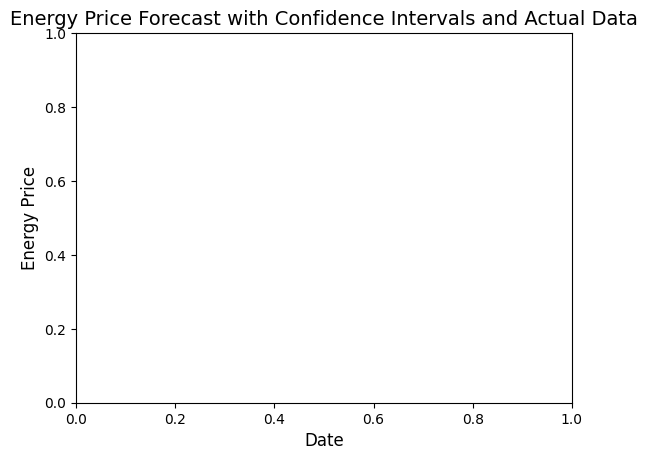

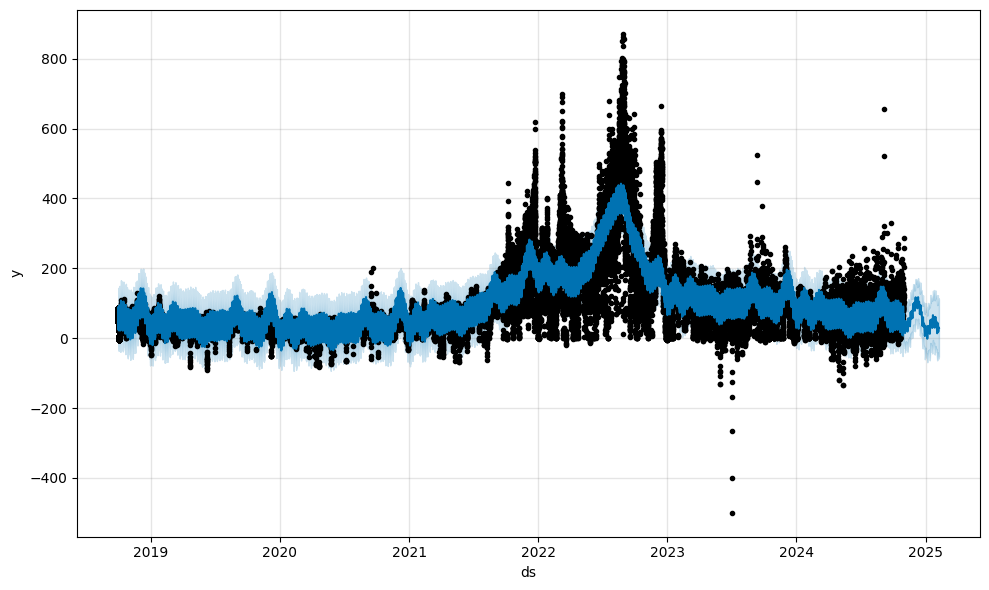

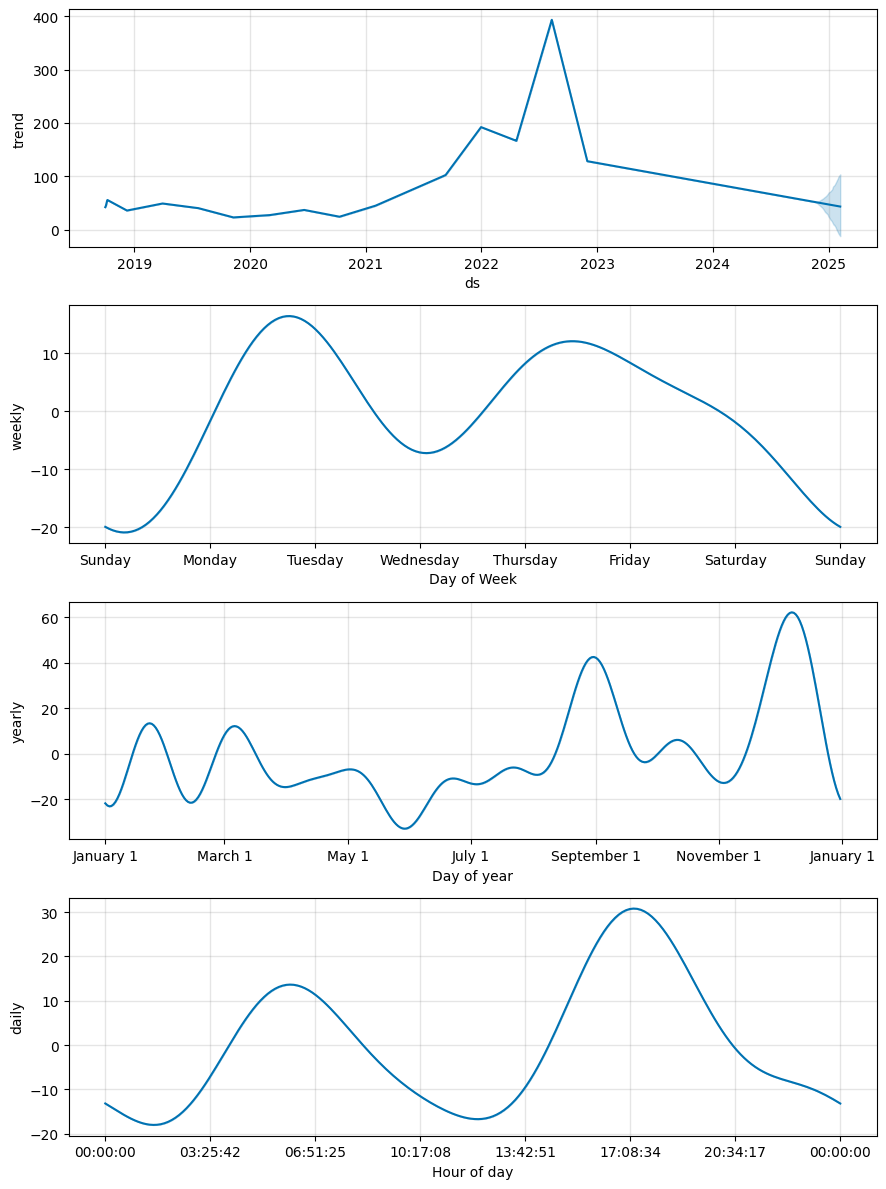

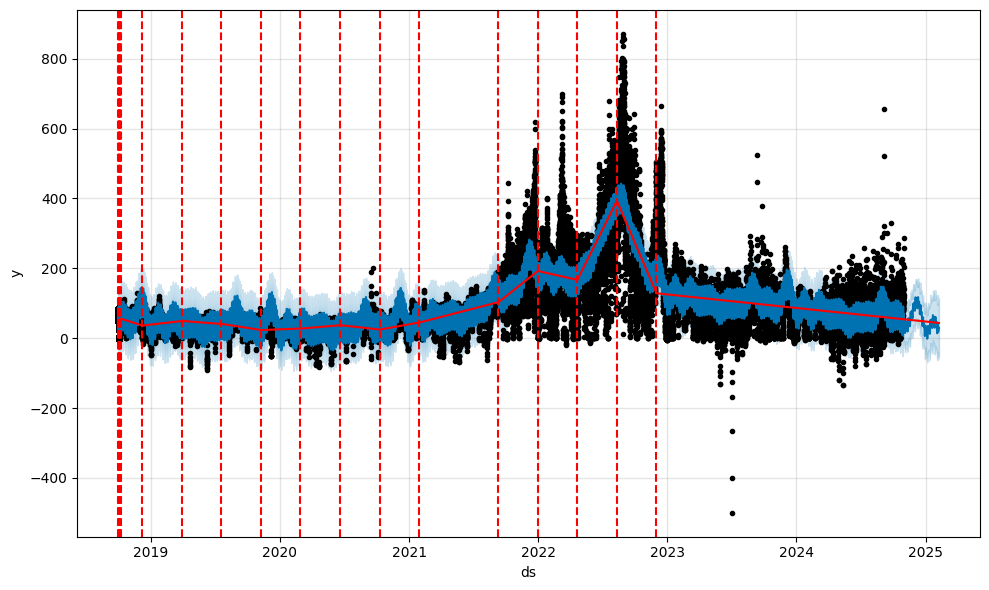

In [89]:
import pandas as pd
from prophet import Prophet

# 1. Read CSV data and filter: Use only data from 2024-01-01 to 2024-07-06
energy_prices = pd.read_csv("../data/day_ahead_energy_prices.csv")

# 2. Rename columns to 'ds' for date and 'y' for values as required by Prophet
energy_prices = energy_prices.rename(columns={"Datetime": "ds", "hourly day-ahead energy price": "y"})

# 3. Remove timezone information from the 'ds' column
energy_prices['ds'] = pd.to_datetime(energy_prices['ds']).dt.tz_localize(None)

# 4. Initialize and train the Prophet model
m = Prophet()
m.fit(energy_prices)

# 5. Create a future dataframe for predictions up to October 31, 2024
# Calculate the number of days between July 6, 2024, and October 31, 2024
future = m.make_future_dataframe(periods=100)
future.tail()

# 6. Make predictions
forecast = m.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# 7. Plot the forecast
# Add title and labels
plt.title('Energy Price Forecast with Confidence Intervals and Actual Data', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Energy Price', fontsize=12)

fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

# 8. Add changepoints to plot
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

forecast



In [90]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Prepare the actual data (energy_prices)
energy_prices = pd.read_csv("../data/day_ahead_energy_prices.csv")
energy_prices = energy_prices.rename(columns={"Datetime": "ds", "hourly day-ahead energy price": "y"})
energy_prices['ds'] = pd.to_datetime(energy_prices['ds']).dt.tz_localize(None)

# 2. Ensure the 'forecast' DataFrame is correctly formatted (from Prophet)
forecast['ds'] = pd.to_datetime(forecast['ds']).dt.tz_localize(None)

# 3. Merge the actual data with the forecast (we will only compare overlapping dates)
comparison_data = energy_prices.set_index('ds').join(forecast.set_index('ds')[['yhat']], how='inner')

# 4. Calculate RMSE (Root Mean Squared Error)
rmse_score = np.sqrt(mean_squared_error(comparison_data['y'], comparison_data['yhat']))
print(f'RMSE Score on Test set: {rmse_score:.2f}')


RMSE Score on Test set: 44.67


In [ ]:
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)